# Heart Disease UCI

https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Dataset information
- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

The "target" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

### Importing libraries

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [41]:
raw_data = pd.read_csv('../input/heart-disease-uci/heart.csv')

### Exploratory Data Analysis (EDA)

In [42]:
raw_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
raw_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [44]:
raw_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [45]:
raw_data.shape

(303, 14)

In [46]:
raw_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


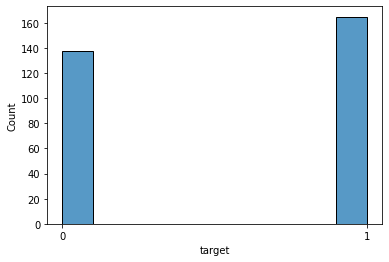

In [47]:
sns.histplot(raw_data['target'])
plt.xticks([0,1])
plt.show()

In [48]:
raw_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

It look's like it is a balanced dataset

In [49]:
raw_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

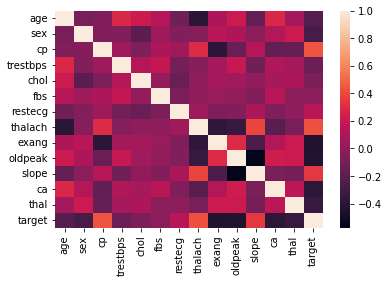

In [50]:
corr = raw_data.corr()
sns.heatmap(corr)
plt.show()

#### Dealing with categorical variables

In [51]:
data_with_dummies = pd.get_dummies(data=raw_data, columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

#### Training and testing data

In [52]:
x = data_with_dummies.drop('target', axis=1)
y = data_with_dummies['target']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [54]:
X_train.shape

(242, 30)

### Scale columns

In [55]:
pipelines = []

pipelines.append(
    ('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())]))
)
pipelines.append(
    ('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())]))
)
pipelines.append(
    ('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())]))
)
pipelines.append(
    ('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())]))
)
pipelines.append(
    ('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())]))
)

pipelines.append(
    ('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())]))
)


In [56]:
n_splits = 10
seed = 7
results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=n_splits, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    
    results.append(cv_results)
    names.append(name)
    
    msg = f'Resultado: {name} - {cv_results.mean()} - {cv_results.std()}'
    print(msg)

Resultado: ScaledLR - 0.8263333333333334 - 0.05127160791098499
Resultado: ScaledLDA - 0.8306666666666667 - 0.046231302526895494
Resultado: ScaledKNN - 0.8219999999999998 - 0.05358689723762289
Resultado: ScaledCART - 0.7686666666666666 - 0.03715433278158073
Resultado: ScaledNB - 0.776 - 0.0980878291238124
Resultado: ScaledSVM - 0.8138333333333334 - 0.06808919803382098


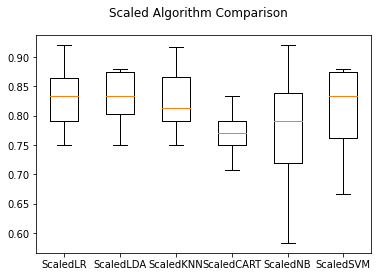

In [57]:
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Tuning and GridSearch KNN for better results

In [58]:
x = data_with_dummies.drop('target', axis=1)
y = data_with_dummies['target']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

model = KNeighborsClassifier()

n_neighbors = [i for i in range(0,(X_train.shape[0] - 30),5)]
param_grid = dict(n_neighbors=n_neighbors)

kfold = KFold(n_splits=n_splits, random_state=seed, shuffle=True)

# model.get_params().keys()
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(X_train_scaled, y_train)

best_n_neighbors = grid_result.best_params_['n_neighbors']

print('Mean Accuracy: %.3f' % grid_result.best_score_)
print('Config: %s' % grid_result.best_params_)

Mean Accuracy: 0.861
Config: {'n_neighbors': 40}


## Define Final Model

In [59]:
x = data_with_dummies.drop('target', axis=1)
y = data_with_dummies['target']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)


scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsClassifier(n_neighbors=best_n_neighbors)
kfold = KFold(n_splits=n_splits, random_state=seed, shuffle=True)

model.fit(X_train_scaled, y_train)

accuracy = model.score(X_test_scaled, y_test)
print(f"The accuracy of the model is {accuracy}")

y_pred = model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_pred,y_test)

The accuracy of the model is 0.8688524590163934
